<a href="https://colab.research.google.com/github/rjhanjee/my-first-repo/blob/main/hw8_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Assignment # 8 Rajat Jhanje
# Question # 1

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm

## this sets some style parameters
sns.set()

## Pandas can read in from a URL

# add a raw link to the URL
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)


# pick the country India and limit the data to India only
df_india = df[df['Country/Region'] == 'India']


df_india = df_india.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis = 1)
df_india.head(4)

# Let Y(t) be the case count for day  t since the outbreak onset for that country

# process the time series so that t is the first day with more than 0 cases

# Create a time series model using a linear regression model with lagged
# features to predict COVID-19 cases in India
# based on the previous five days' case counts.

df_india = df_india.T


# fit a distributed lag linear model

# Prepare the df_india DataFrame for time series analysis
#by converting the index to datetime objects and ensuring the case counts
# are in a single column

# Convert the index to datetime objects and rename the column
# to prepare the DataFrame for time series analysis

df_india.index = pd.to_datetime(df_india.index)
df_india = df_india.rename(columns={148: 'cases'})


# Generate lagged features for the past five days' case counts
# Generate lagged features for the past five days'
#case counts by creating new columns with shifted values
# and handle the resulting missing values.

for i in range(1, 6):
    df_india[f'cases_lag_{i}'] = df_india['cases'].shift(i)

df_india.dropna(inplace=True)


# drop the rows where all entries are zero
df_india = df_india[df_india['cases'] > 0]


# Split the data into training and testing sets
# Determine the training set size, split the data
# into training and testing sets,
# and separate features and the target variable for both sets.

# trainFraction = .75

# sample = np.random.uniform(size = len(df_india)) < trainFraction
# trainingDat = df_india[sample]
# testingDat = df_india[~sample]

# # use ols command for linear regression on training data

# results = smf.ols('cases ~ cases_lag_1 + cases_lag_2 + cases_lag_3 + cases_lag_4 + cases_lag_5', data = trainingDat).fit()

# print summary of the results

# print(results.summary())

y = df_india.cases
x = df_india.drop(['cases'], axis=1)
fit = lm.LinearRegression().fit(x, y)
yhat = fit.predict(x)
[fit.intercept_, fit.coef_]

/tmp/ipython-input-3198632848.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_india.index = pd.to_datetime(df_india.index)


[np.float64(747.5301267541945),
 array([ 2.21996609, -1.50012502,  0.50389499, -0.39497812,  0.17122463])]

Explaination of results in question 1
Intercept is 747
For every one unit increase in cases_lag_1, cases will increase by 2.2 unit (while keeping other lag values constant)

For every one unit increases in cases_lag_2, cases will decrease by 1.5 units (while keeping other lag values constant)

For every one unit increases in cases_lag_3, cases will increase by 0.5 units (while keeping other lag values constant)

For every one unit increases in cases_lag_4, cases will decrease by 0.39 units (while keeping other lag values constant)

For every one unit increases in cases_lag_5, cases will increase by 0.17 units (while keeping other lag values constant)



First few rows of usa data
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --


/tmp/ipython-input-3325366412.py:56: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_usa.index = pd.to_datetime(df_usa.index)
/tmp/ipython-input-3325366412.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_canada.index = pd.to_datetime(df_canada.index)


,cases,cases_lag_1,cases_lag_2,cases_lag_3,cases_lag_4,cases_lag_5
2020-01-27,5,5.0,2.0,2.0,1.0,1.0
2020-01-28,5,5.0,5.0,2.0,2.0,1.0
2020-01-29,6,5.0,5.0,5.0,2.0,2.0
2020-01-30,6,6.0,5.0,5.0,5.0,2.0
2020-01-31,8,6.0,6.0,5.0,5.0,5.0


------------------------------------------------------------
First few rows of canada data
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --


,cases,cases_lag_1,cases_lag_2,cases_lag_3,cases_lag_4,cases_lag_5
2020-03-06,1,0.0,0.0,0.0,0.0,0.0
2020-03-07,2,1.0,0.0,0.0,0.0,0.0
2020-03-08,4,2.0,1.0,0.0,0.0,0.0
2020-03-09,7,4.0,2.0,1.0,0.0,0.0
2020-03-10,7,7.0,4.0,2.0,1.0,0.0


------------------------------------------------------------
. USA is country A and Canada is country B
a. fit the model on (all of) usa data only and apply it to (all of) usa to get the mean squared error
------------------------------------------------------------
Intercept: 7301.4
Coefficient 1: 1.5
Coefficient 2: -0.5
Coefficient 3: 0.2
Coefficient 4: -0.1
Coefficient 5: -0.2
Mean Squared Error: 4161913286.2


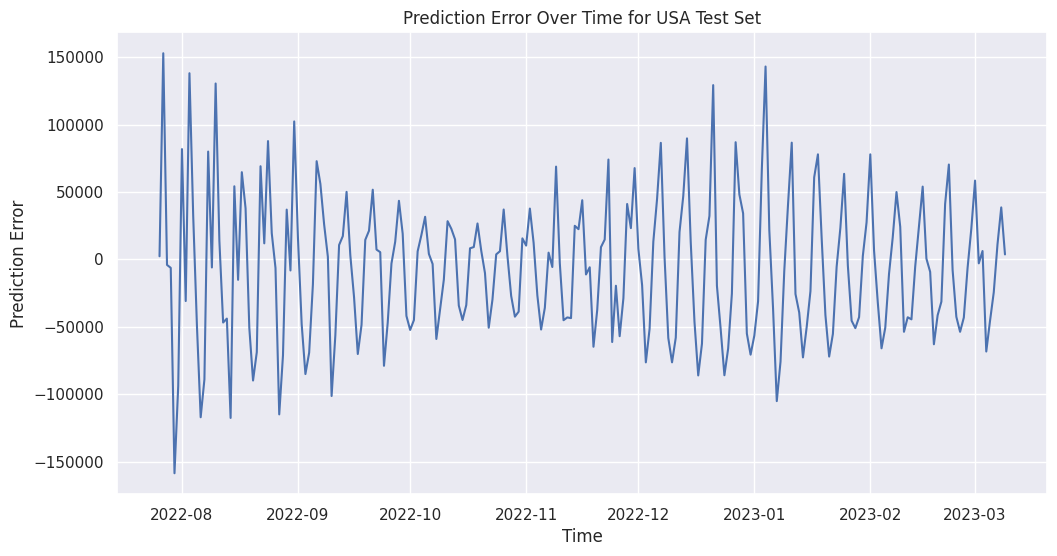

In [29]:
# Assignment 8. Rajat Jhanjee
# Question # 2
# will use USA as country A, Canada as country B

import pandas as pd ## Pandas is our main data cleaning library
import numpy as np ## Numpy is our main numerical library
import matplotlib as mpl ## Matplotlib is our main plotting library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# import sklearn.linear_model as lm
# import sklearn as skl
# import statsmodels.formula.api as smf
# import statsmodels as sm

## Pandas can read in from a URL

# add a raw link to the URL
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)

df.head(4)

# pick two countries USA and Canda and keep their data only
df_usa = df[df['Country/Region'] == 'US']
df_canada = df[df['Country/Region'] == 'Canada']


df_usa = df_usa.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis = 1)
df_canada = df_canada.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis = 1)
df_usa.head(4)
df_canada.head(4)

# Let Y(t) be the case count for day  t since the outbreak onset for that country

# process the time series so that t is the first day with more than 0 cases

# Create a time series model using a linear regression model with lagged
# features to predict COVID-19 cases in India
# based on the previous five days' case counts.

df_usa = df_usa.T
df_canada = df_canada.T
df_usa.head()
df_canada.head()

# fit a distributed lag linear model

# Prepare the df_india DataFrame for time series analysis
#by converting the index to datetime objects and ensuring the case counts
# are in a single column

# Convert the index to datetime objects and rename the column
# to prepare the DataFrame for time series analysis

df_usa.index = pd.to_datetime(df_usa.index)
df_usa.columns = ['cases']
df_usa.head()

df_canada.index = pd.to_datetime(df_canada.index)
df_canada = df_canada[[40]].rename(columns={40: 'cases'})
df_canada.head()

# Generate lagged features for the past five days' case counts
# Generate lagged features for the past five days'
#case counts by creating new columns with shifted values
# and handle the resulting missing values.

for i in range(1, 6):
    df_usa[f'cases_lag_{i}'] = df_usa['cases'].shift(i)
    df_canada[f'cases_lag_{i}'] = df_canada['cases'].shift(i)

df_usa.dropna(inplace=True)
df_canada.dropna(inplace=True)

df_usa.head()
df_canada.head()


# drop the rows where all entries are zero
df_usa = df_usa[df_usa['cases'] > 0]
print("First few rows of usa data")
print(" --"*30)
display(df_usa.head())
print("--"*30)
df_canada = df_canada[df_canada['cases'] > 0]
print("First few rows of canada data")
print(" --"*30)
display(df_canada.head())
print("--"*30)

# a. fit the model on (all of) usa data only and apply it to (all of) usa to get the mean squared error

print(". USA is country A and Canada is country B")
print("a. fit the model on (all of) usa data only and apply it to (all of) usa to get the mean squared error")
print("--"*30)

y = df_usa.cases
x = df_usa.drop(['cases'], axis=1)
fit = lm.LinearRegression().fit(x, y)
yhat = fit.predict(x)
[fit.intercept_, fit.coef_]
# limit to 1 decimal places

print(f'Intercept: {fit.intercept_:.1f}')

# print coef
for i, coef in enumerate(fit.coef_):
    print(f'Coefficient {i+1}: {coef:.1f}')


print(f'Mean Squared Error: {mean_squared_error(y, yhat):.1f}')

# create a plot of time vs prediction error

# Calculate the prediction error for the test set
prediction_error = y_test - y_pred

# Create a plot of time vs prediction error
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, prediction_error)
plt.xlabel('Time')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Over Time for USA Test Set')
plt.grid(True)
plt.show()

# Plot the errors over time for applying the model from usa and applying it to canada, and report the mean squared error.






In [36]:
# Revised approach for data cleaning and splitting

# Generate lagged features for the past five days' case counts for df_usa
for i in range(1, 6):
    df_usa[f'cases_lag_{i}'] = df_usa['cases'].shift(i)

# Drop rows with NaN values (introduced by lagging)
df_usa.dropna(inplace=True)

# Drop the rows where all entries are zero (current case and lagged cases)
df_usa = df_usa[(df_usa[['cases'] + [f'cases_lag_{i}' for i in range(1, 6)]] > 0).any(axis=1)]

# Check if there is enough data after cleaning
if len(df_usa) > 0:
    print(f'Length of df_usa after cleaning and lagging: {len(df_usa)}')

    # Split the data into training and testing sets
    trainFraction = 0.50
    train_size = int(len(df_usa) * trainFraction)
    train_data = df_usa[:train_size]
    test_data = df_usa[train_size:]

    # Check if train and test sets are not empty
    if len(train_data) > 0 and len(test_data) > 0:

        X_train = train_data[['cases_lag_1', 'cases_lag_2', 'cases_lag_3', 'cases_lag_4', 'cases_lag_5']]
        y_train = train_data['cases']

        X_test = test_data[['cases_lag_1', 'cases_lag_2', 'cases_lag_3', 'cases_lag_4', 'cases_lag_5']]
        y_test = test_data['cases']

        # Fit a linear regression model using the lagged
        # features to predict the current day's cases
        # Import the LinearRegression model and
        # fit it to the training data

        model = LinearRegression()
        model.fit(X_train, y_train)

        # # Evaluate the performance of the fitted model.
        # # Evaluate the fitted model by making predictions
        # # on the test set and calculating RMSE and R-squared.

        y_pred = model.predict(X_test)

        # calculate the MSE in the training and test sets
        train_mse = mean_squared_error(y_train, model.predict(X_train))
        test_mse = mean_squared_error(y_test, y_pred)

        print(f'Training MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
    else:
        print("Error: Training or testing data is empty after cleaning and splitting.")
else:
    print("Error: Not enough data after dropping rows with zero cases.")

Length of df_usa after cleaning and lagging: 1113
Training MSE: 563927858.1670115
Test MSE: 8162116866.131294


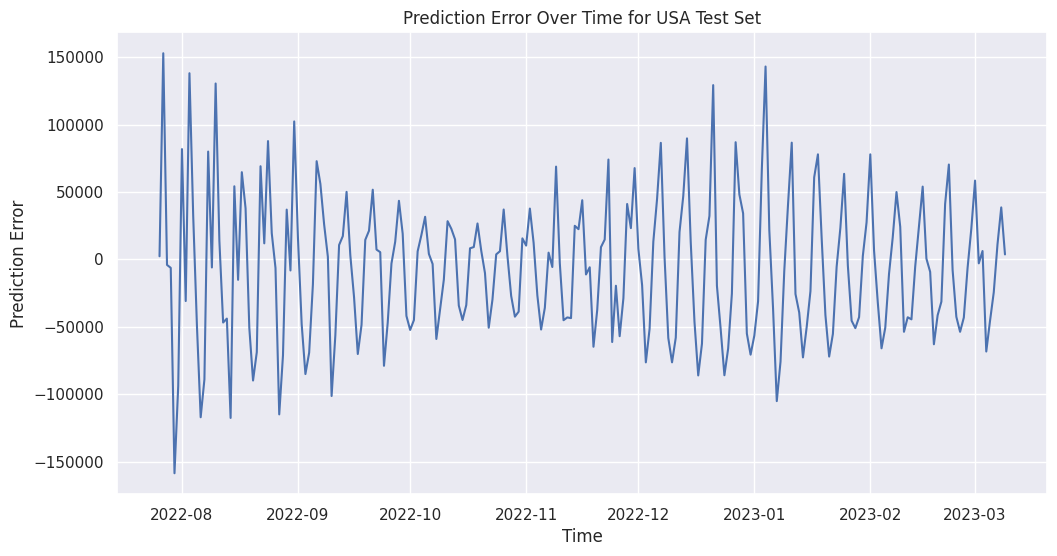

In [28]:
# Calculate the prediction error for the test set
prediction_error = y_test - y_pred

# Create a plot of time vs prediction error
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, prediction_error)
plt.xlabel('Time')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Over Time for USA Test Set')
plt.grid(True)
plt.show()

Mean Squared Error for USA model applied to Canada data: 10867790.7


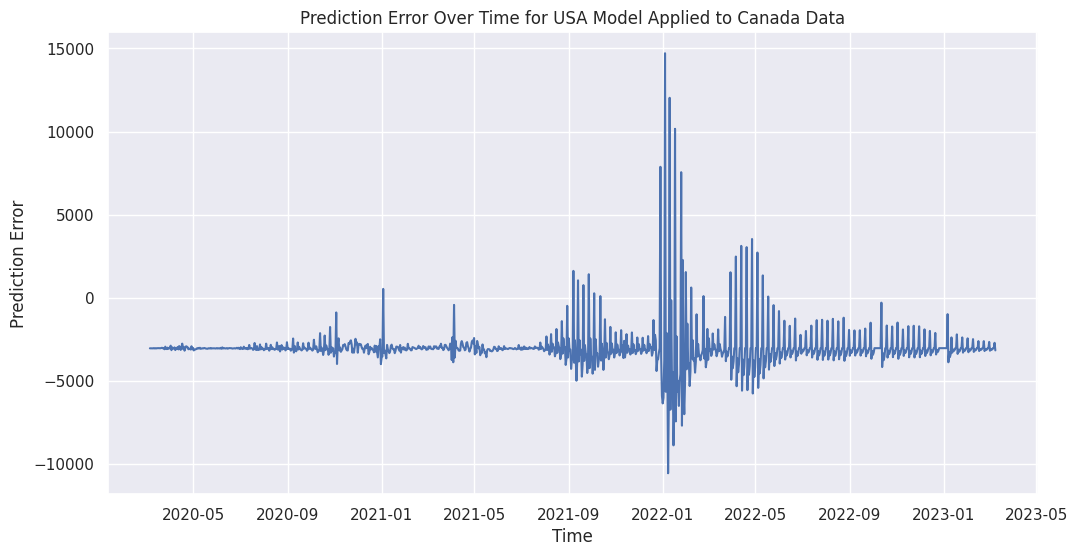

In [37]:
# Apply the model trained on USA data to Canada data

# Prepare Canada data (df_canada already has lagged features and NaNs dropped)
X_canada = df_canada[['cases_lag_1', 'cases_lag_2', 'cases_lag_3', 'cases_lag_4', 'cases_lag_5']]
y_canada = df_canada['cases']

# Predict on Canada data using the model trained on USA data
y_pred_canada = model.predict(X_canada)

# Calculate the prediction error for Canada data
prediction_error_canada = y_canada - y_pred_canada

# Calculate the Mean Squared Error for predictions on Canada data
mse_canada = mean_squared_error(y_canada, y_pred_canada)

print(f'Mean Squared Error for USA model applied to Canada data: {mse_canada:.1f}')

# Create a plot of time vs prediction error for Canada data
plt.figure(figsize=(12, 6))
plt.plot(X_canada.index, prediction_error_canada)
plt.xlabel('Time')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Over Time for USA Model Applied to Canada Data')
plt.grid(True)
plt.show()

In [47]:
# Assignment # 8 Rajat Jhanje
# Question # 4

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm

## this sets some style parameters
sns.set()

## Pandas can read in from a URL

# add a raw link to the URL
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)


# pick the country India and limit the data to India only
df_india = df[df['Country/Region'] == 'India']


df_india = df_india.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis = 1)
df_india.head(4)

# Let Y(t) be the case count for day  t since the outbreak onset for that country

# process the time series so that t is the first day with more than 0 cases

# Create a time series model using a linear regression model with lagged
# features to predict COVID-19 cases in India
# based on the previous five days' case counts.

df_india = df_india.T


# fit a distributed lag linear model

# Prepare the df_india DataFrame for time series analysis
#by converting the index to datetime objects and ensuring the case counts
# are in a single column

# Convert the index to datetime objects and rename the column
# to prepare the DataFrame for time series analysis

df_india.index = pd.to_datetime(df_india.index)
df_india = df_india.rename(columns={148: 'cases'})


# Generate lagged features for the past five days' case counts
# Generate lagged features for the past five days'
#case counts by creating new columns with shifted values
# and handle the resulting missing values.

for i in range(1, 6):
    df_india[f'cases_lag_{i}'] = df_india['cases'].shift(i)

df_india.dropna(inplace=True)


# drop the rows where all entries are zero
df_india = df_india[df_india['cases'] > 0]

# add a column Z to df_india that is 1 if cases > cases_lag_1 and 0 otherwise
df_india['Z'] = (df_india['cases'] > df_india['cases_lag_1']).astype(int)
display(df_india.head())

# Assign x to all lag cases
x = df_india[['cases_lag_1', 'cases_lag_2', 'cases_lag_3', 'cases_lag_4', 'cases_lag_5']]
y = df_india['Z']

# Add the intercept column
x = sm.tools.add_constant(x)

# Fit the logistic regression model
model = sm.api.Logit(y, x).fit()

# Print the summary of the model
print(model.summary())


/tmp/ipython-input-2086462678.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_india.index = pd.to_datetime(df_india.index)


,cases,cases_lag_1,cases_lag_2,cases_lag_3,cases_lag_4,cases_lag_5,Z
2020-01-30,1,0.0,0.0,0.0,0.0,0.0,1
2020-01-31,1,1.0,0.0,0.0,0.0,0.0,0
2020-02-01,1,1.0,1.0,0.0,0.0,0.0,0
2020-02-02,2,1.0,1.0,1.0,0.0,0.0,1
2020-02-03,3,2.0,1.0,1.0,1.0,0.0,1


Optimization terminated successfully.
         Current function value: 0.109684
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      Z   No. Observations:                 1135
Model:                          Logit   Df Residuals:                     1129
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                  0.3194
Time:                        20:54:11   Log-Likelihood:                -124.49
converged:                       True   LL-Null:                       -182.92
Covariance Type:            nonrobust   LLR p-value:                 1.450e-23
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8770      0.226      3.874      0.000       0.433       1.321
cases_lag_1     0.0003   

Meaning of coefficients  for question 4 (logistial regression)
since the coefficients of all the lag cases are very low, they do not seem
to have much impact on the prediction if future cases will be higher or lower.